## Dataset downloaded from Kaggle: https://www.kaggle.com/datasets/gauravduttakiit/gender-based-violence-tweet-classification 

In [1]:
import pandas as pd

GBV_train = 'archive/Train.csv'

read_GBV_train = pd.read_csv(GBV_train, sep=',')

#drop column Tweet_ID
read_GBV_train.drop(columns=['Tweet_ID'], inplace=True)

print(read_GBV_train.head())


                                               tweet             type
0  Had a dream i got raped last night. By a guy i...  sexual_violence
1  he thought the word raped means sex and told m...  sexual_violence
2  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...  sexual_violence
3  I was sexually abused for 3 years at age 4 to ...  sexual_violence
4  Chessy Prout can do better by telling the trut...  sexual_violence


### Visualise Data 

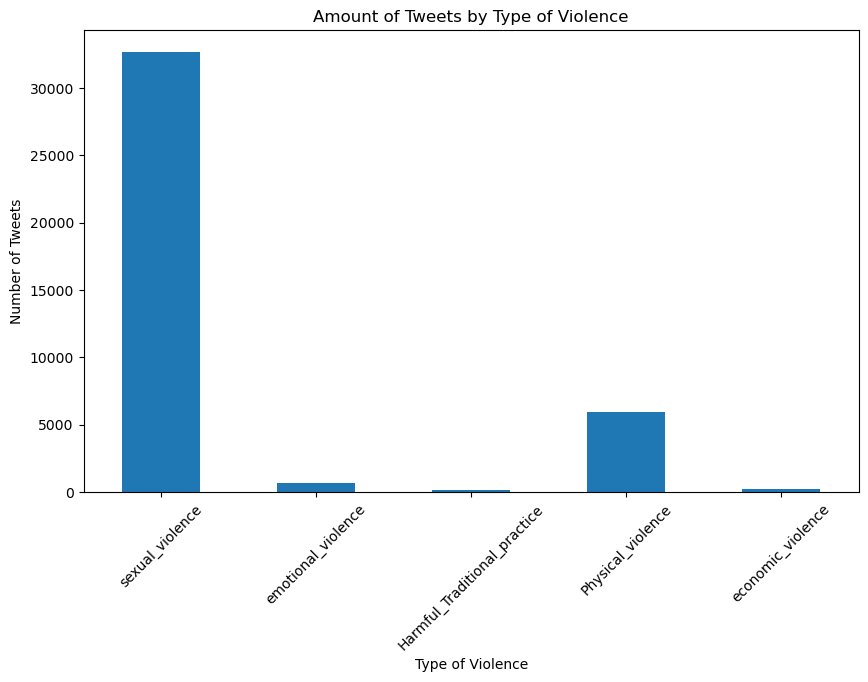

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


#Count the occurrences of each type of violence
violence_counts = read_GBV_train['type'].value_counts()

specified_violence_counts = violence_counts.loc[
    ['sexual_violence', 'emotional_violence', 'Harmful_Traditional_practice', 'Physical_violence', 'economic_violence']
]

#Create the bar chart
plt.figure(figsize=(10, 6)) 
specified_violence_counts.plot(kind='bar')

#Setting the title and labels
plt.title('Amount of Tweets by Type of Violence')
plt.xlabel('Type of Violence')
plt.ylabel('Number of Tweets')

plt.xticks(rotation=45)  
plt.show()


In [3]:
#Print the counts for better understanding
print("Sexual Violence:", specified_violence_counts['sexual_violence'])
print("Emotional Violence:", specified_violence_counts['emotional_violence'])
print("Harmful Traditional Practice:", specified_violence_counts['Harmful_Traditional_practice'])
print("Physical Violence:", specified_violence_counts['Physical_violence'])
print("Economic Violence:", specified_violence_counts['economic_violence'])


Sexual Violence: 32648
Emotional Violence: 651
Harmful Traditional Practice: 188
Physical Violence: 5946
Economic Violence: 217


In [4]:
### text preprocessing  

def clean_and_convert_text(raw_text):
    import unicodedata
    import nltk
    import string
    import contractions
    
    #Ensure nltk resources
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    
    #Convert UTF characters
    def convert_utf(text):
        text = text.replace('\u2018', "'").replace('\u2019', "'").replace('\u201C', "`").replace('\u201D', "`").replace('\u2013', '-').replace('\u2014', '-')
        text = unicodedata.normalize('NFKD', text)
        text = text.encode('ascii', 'ignore')
        return text.decode('ascii')
    
    UTF_text = convert_utf(raw_text)
    normalised_text = UTF_text.lower()
    words = nltk.word_tokenize(normalised_text)
    
    #Remove punctuations and expand contractions
    words = [contractions.fix(word) for word in words if word not in string.punctuation]
    
    #Remove numbers and specific symbols
    words = [word for word in words if not word.isdigit() and word not in ['---', '...', '***']]
    
    #Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    return words


In [5]:
import pandas as pd
import unicodedata
import string
import nltk
import contractions


In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/jen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import pandas as pd #provides data structures for efficiently storing and analyzing data
import matplotlib.pyplot as plt #visualization library/  provides a simple interface for creating various types of plots and charts.
import seaborn as sns #It provides a high-level interface for creating aesthetically pleasing and informative statistical graphics.
from sklearn.feature_extraction.text import CountVectorizer #It is used to convert a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS # a set of English stop words provided by Scikit-learn
from sklearn.naive_bayes import MultinomialNB #a classification algorithm provided by Scikit-learn, used for text classification tasks 
from sklearn.metrics import accuracy_score #calculate the accuracy of a classification model's predictions.
from sklearn.linear_model import LogisticRegression #a classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer#perform text vectorising
from sklearn.model_selection import train_test_split as split#for training classifier model
from sklearn.metrics import classification_report#produce classification report

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import unicodedata
import nltk
import string
import contractions

#using the reprocessing function directly returning a list of preprocessed words
def clean_and_convert_text(raw_text):
    #Convert UTF characters
    def convert_utf(text):
        text = text.replace('\u2018', "'").replace('\u2019', "'").replace('\u201C', "`").replace('\u201D', "`").replace('\u2013', '-').replace('\u2014', '-')
        text = unicodedata.normalize('NFKD', text)
        text = text.encode('ascii', 'ignore')
        return text.decode('ascii')
    
    UTF_text = convert_utf(raw_text)
    normalised_text = UTF_text.lower()
    words = nltk.word_tokenize(normalised_text)
    
    #Remove punctuations and expand contractions
    words = [contractions.fix(word) for word in words if word not in string.punctuation]
    
    #Remove numbers and specific symbols
    words = [word for word in words if not word.isdigit() and word not in ['---', '...', '***']]
    
    #Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    return words

#Load the dataset
train_data_path = "archive/Train.csv"
train_data = pd.read_csv(train_data_path)

#Apply preprocessing 
train_data['cleaned_text'] = train_data['tweet'].apply(clean_and_convert_text)


X_train = train_data['cleaned_text']
y_train = train_data['type']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=123456789)


#Convert list of preprocessed words into strings
X_train_str = X_train.apply(lambda x: ' '.join(map(str, x)) if x is not None else '')
X_test_str = X_test.apply(lambda x: ' '.join(map(str, x)) if x is not None else '')

#Create the TF-IDF vectorizer without removing stop words
vectorizer = TfidfVectorizer()

#Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train_str)

#Transform the test data
X_test_vec = vectorizer.transform(X_test_str)

#Train the Naive Bayes classifier
NB_model = MultinomialNB(alpha=0.5).fit(X=X_train_vec, y=y_train)

#Training accuracy
train_accuracy = accuracy_score(y_train, NB_model.predict(X_train_vec))
print("- Training accuracy: {:.2%}".format(train_accuracy))

#Testing accuracy on test data
test_accuracy = accuracy_score(y_test, NB_model.predict(X_test_vec))
print("- Testing accuracy on test data: {:.2%}".format(test_accuracy))


- Training accuracy: 93.17%
- Testing accuracy on test data: 91.23%


In [9]:
from sklearn.metrics import classification_report

#Classification report on training data
train_predictions = NB_model.predict(X_train_vec)
print("Classification Report on Training Data:")
print(classification_report(y_train, train_predictions))

#Classification report on test data
test_predictions = NB_model.predict(X_test_vec)
print("Classification Report on Test Data:")
print(classification_report(y_test, test_predictions))


Classification Report on Training Data:


/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      0.12      0.21       143
           Physical_violence       0.99      0.72      0.84      4484
           economic_violence       0.00      0.00      0.00       169
          emotional_violence       0.84      0.06      0.10       487
             sexual_violence       0.92      1.00      0.96     24454

                    accuracy                           0.93     29737
                   macro avg       0.75      0.38      0.42     29737
                weighted avg       0.93      0.93      0.92     29737

Classification Report on Test Data:
                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      0.02      0.04        45
           Physical_violence       1.00      0.58      0.73      1462
           economic_violence       0.00      0.00      0.00        48
          emotional_violence       1.00      0.02 

/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from joblib import dump

# ave the NB trained model 
model_filename = 'naive_bayes_model.joblib'
dump(NB_model, model_filename)


['naive_bayes_model.joblib']

In [12]:
import pandas as pd
from joblib import load

test_data_path = "archive/Test.csv"  
test_data = pd.read_csv(test_data_path)

test_data['cleaned_text'] = test_data['tweet'].apply(clean_and_convert_text)

X_test = test_data['cleaned_text']
X_test_str = X_test.apply(lambda x: ' '.join(map(str, x)) if x is not None else '')

#Load the  model
loaded_model = load(model_filename)

X_test_vec = vectorizer.transform(X_test_str)

#predictions on the test data
test_predictions = loaded_model.predict(X_test_vec)

#Add predictions to the test data
test_data['predicted_type'] = test_predictions

#Save the test data
test_data.to_csv("archive/Test_with_predictions.csv", index=False)


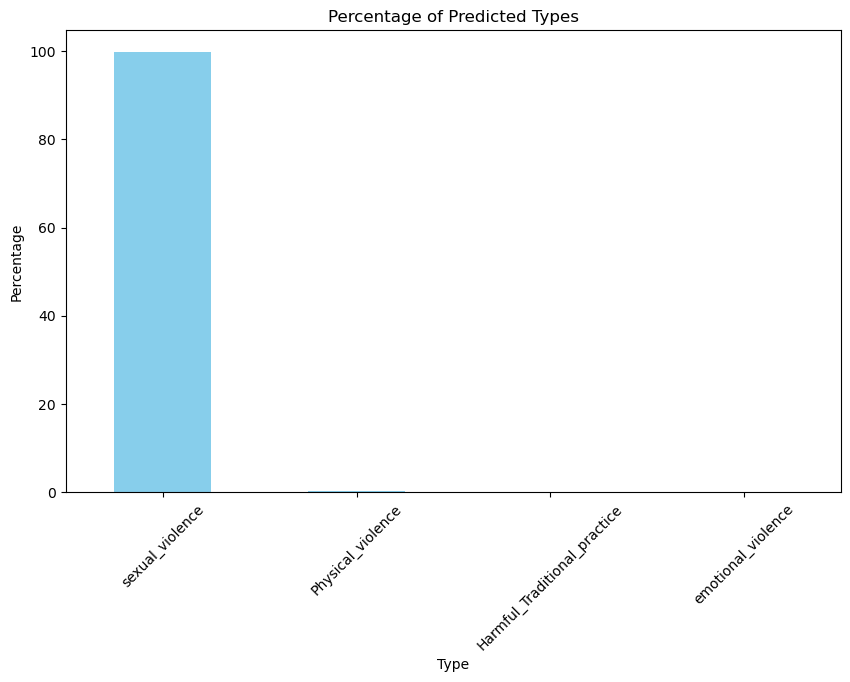

Percentage of each type:
predicted_type
sexual_violence                 99.781786
Physical_violence                0.147616
Harmful_Traditional_practice     0.064181
emotional_violence               0.006418
Name: count, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

test_data_with_predictions = pd.read_csv("archive/Test_with_predictions.csv")

type_counts = test_data_with_predictions['predicted_type'].value_counts()

total_predictions = type_counts.sum()
type_percentages = (type_counts / total_predictions) * 100

#Plot the bar chart
plt.figure(figsize=(10, 6))
type_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Predicted Types')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

print("Percentage of each type:")
print(type_percentages)
